In [59]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib
import seaborn as sns 
import sklearn
from scipy import stats
import scipy
import pywt
from sklearn import svm

In [60]:
data=pd.read_csv('D:\REPO_progetto\TesiBiomedica\ERP_SUB12hz',header=None)
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,136,137,138,139,140,141,142,143,144,145
0,epochs_1-epo.fif,Animali,-2.055415e-07,-2.028165e-07,-1.960136e-07,-1.848590e-07,-1.692405e-07,-1.492071e-07,-1.249650e-07,-9.687344e-08,...,-1.426846e-07,-1.507382e-07,-1.613104e-07,-1.743136e-07,-1.895155e-07,-2.065486e-07,-2.249290e-07,-2.440830e-07,-2.633836e-07,-2.821918e-07
1,epochs_1-epo.fif,Uomini,2.228064e-07,1.998174e-07,1.711929e-07,1.375934e-07,1.001281e-07,6.026143e-08,1.968783e-08,-1.981391e-08,...,-1.509319e-07,-2.114814e-07,-2.568800e-07,-2.866151e-07,-3.009505e-07,-3.009218e-07,-2.882733e-07,-2.653386e-07,-2.348747e-07,-1.998669e-07
2,epochs_1-epo.fif,Cibo,4.776677e-08,2.620314e-08,5.619400e-09,-1.326074e-08,-2.980924e-08,-4.352704e-08,-5.406327e-08,-6.122016e-08,...,-1.728349e-07,-1.738770e-07,-1.724506e-07,-1.684931e-07,-1.621342e-07,-1.536630e-07,-1.434821e-07,-1.320553e-07,-1.198579e-07,-1.073358e-07
3,epochs_1-epo.fif,Veicoli,3.540479e-08,-1.285718e-09,-3.598971e-08,-6.714279e-08,-9.330562e-08,-1.132462e-07,-1.260213e-07,-1.310499e-07,...,-8.318398e-08,-1.181444e-07,-1.490733e-07,-1.752995e-07,-1.964077e-07,-2.122511e-07,-2.229478e-07,-2.288607e-07,-2.305646e-07,-2.288038e-07
4,epochs_1-epo.fif,Strumenti,9.339743e-08,9.167817e-08,8.353003e-08,6.946650e-08,5.044634e-08,2.781249e-08,3.192977e-09,-2.162764e-08,...,-8.854320e-07,-8.770753e-07,-8.673637e-07,-8.563723e-07,-8.439294e-07,-8.296375e-07,-8.129297e-07,-7.931532e-07,-7.696732e-07,-7.419827e-07


In [61]:
data

,0,1,2,3,4,5,6,7,8,9,...,136,137,138,139,140,141,142,143,144,145
0,epochs_1-epo.fif,Animali,-2.055415e-07,-2.028165e-07,-1.960136e-07,-1.848590e-07,-1.692405e-07,-1.492071e-07,-1.249650e-07,-9.687344e-08,...,-1.426846e-07,-1.507382e-07,-1.613104e-07,-1.743136e-07,-1.895155e-07,-2.065486e-07,-2.249290e-07,-2.440830e-07,-2.633836e-07,-2.821918e-07
1,epochs_1-epo.fif,Uomini,2.228064e-07,1.998174e-07,1.711929e-07,1.375934e-07,1.001281e-07,6.026143e-08,1.968783e-08,-1.981391e-08,...,-1.509319e-07,-2.114814e-07,-2.568800e-07,-2.866151e-07,-3.009505e-07,-3.009218e-07,-2.882733e-07,-2.653386e-07,-2.348747e-07,-1.998669e-07
2,epochs_1-epo.fif,Cibo,4.776677e-08,2.620314e-08,5.619400e-09,-1.326074e-08,-2.980924e-08,-4.352704e-08,-5.406327e-08,-6.122016e-08,...,-1.728349e-07,-1.738770e-07,-1.724506e-07,-1.684931e-07,-1.621342e-07,-1.536630e-07,-1.434821e-07,-1.320553e-07,-1.198579e-07,-1.073358e-07
3,epochs_1-epo.fif,Veicoli,3.540479e-08,-1.285718e-09,-3.598971e-08,-6.714279e-08,-9.330562e-08,-1.132462e-07,-1.260213e-07,-1.310499e-07,...,-8.318398e-08,-1.181444e-07,-1.490733e-07,-1.752995e-07,-1.964077e-07,-2.122511e-07,-2.229478e-07,-2.288607e-07,-2.305646e-07,-2.288038e-07
4,epochs_1-epo.fif,Strumenti,9.339743e-08,9.167817e-08,8.353003e-08,6.946650e-08,5.044634e-08,2.781249e-08,3.192977e-09,-2.162764e-08,...,-8.854320e-07,-8.770753e-07,-8.673637e-07,-8.563723e-07,-8.439294e-07,-8.296375e-07,-8.129297e-07,-7.931532e-07,-7.696732e-07,-7.419827e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,epochs_47-epo.fif,Animali,1.281752e-08,-9.499243e-09,-2.946652e-08,-4.584653e-08,-5.773468e-08,-6.462797e-08,-6.644613e-08,-6.350828e-08,...,1.594277e-07,1.418506e-07,1.196595e-07,9.363518e-08,6.470890e-08,3.396053e-08,2.614152e-09,-2.797726e-08,-5.636718e-08,-8.107686e-08
161,epochs_47-epo.fif,Uomini,-1.561940e-07,-8.091865e-08,-6.924286e-09,6.310736e-08,1.262714e-07,1.796578e-07,2.206116e-07,2.470087e-07,...,-4.756959e-07,-4.000165e-07,-3.009824e-07,-1.855705e-07,-6.165225e-08,6.259503e-08,1.792860e-07,2.813880e-07,3.632053e-07,4.207535e-07
162,epochs_47-epo.fif,Cibo,-1.453601e-07,-1.634590e-07,-1.753591e-07,-1.807150e-07,-1.793830e-07,-1.714218e-07,-1.570912e-07,-1.368446e-07,...,-9.502102e-08,-1.108364e-07,-1.295221e-07,-1.511233e-07,-1.754129e-07,-2.018864e-07,-2.297764e-07,-2.580871e-07,-2.856499e-07,-3.111973e-07
163,epochs_47-epo.fif,Veicoli,5.520164e-08,4.449045e-08,3.411041e-08,2.461585e-08,1.629605e-08,9.158137e-09,2.965865e-09,-2.677122e-09,...,-1.468322e-07,-1.186748e-07,-8.037050e-08,-3.365367e-08,1.957556e-08,7.736940e-08,1.378264e-07,1.991574e-07,2.597224e-07,3.180436e-07


In [62]:
#elimino le prime due colonne 
data.drop(data.columns[0], axis=1, inplace=True)
data.drop(data.columns[0], axis=1, inplace=True)
data.head()

,2,3,4,5,6,7,8,9,10,11,...,136,137,138,139,140,141,142,143,144,145
0,-2.055415e-07,-2.028165e-07,-1.960136e-07,-1.848590e-07,-1.692405e-07,-1.492071e-07,-1.249650e-07,-9.687344e-08,-6.543976e-08,-3.131357e-08,...,-1.426846e-07,-1.507382e-07,-1.613104e-07,-1.743136e-07,-1.895155e-07,-2.065486e-07,-2.249290e-07,-2.440830e-07,-2.633836e-07,-2.821918e-07
1,2.228064e-07,1.998174e-07,1.711929e-07,1.375934e-07,1.001281e-07,6.026143e-08,1.968783e-08,-1.981391e-08,-5.653144e-08,-8.895930e-08,...,-1.509319e-07,-2.114814e-07,-2.568800e-07,-2.866151e-07,-3.009505e-07,-3.009218e-07,-2.882733e-07,-2.653386e-07,-2.348747e-07,-1.998669e-07
2,4.776677e-08,2.620314e-08,5.619400e-09,-1.326074e-08,-2.980924e-08,-4.352704e-08,-5.406327e-08,-6.122016e-08,-6.494570e-08,-6.531775e-08,...,-1.728349e-07,-1.738770e-07,-1.724506e-07,-1.684931e-07,-1.621342e-07,-1.536630e-07,-1.434821e-07,-1.320553e-07,-1.198579e-07,-1.073358e-07
3,3.540479e-08,-1.285718e-09,-3.598971e-08,-6.714279e-08,-9.330562e-08,-1.132462e-07,-1.260213e-07,-1.310499e-07,-1.281709e-07,-1.176773e-07,...,-8.318398e-08,-1.181444e-07,-1.490733e-07,-1.752995e-07,-1.964077e-07,-2.122511e-07,-2.229478e-07,-2.288607e-07,-2.305646e-07,-2.288038e-07
4,9.339743e-08,9.167817e-08,8.353003e-08,6.946650e-08,5.044634e-08,2.781249e-08,3.192977e-09,-2.162764e-08,-4.485469e-08,-6.483418e-08,...,-8.854320e-07,-8.770753e-07,-8.673637e-07,-8.563723e-07,-8.439294e-07,-8.296375e-07,-8.129297e-07,-7.931532e-07,-7.696732e-07,-7.419827e-07


In [63]:
#trasformo i dati in matrice numpy 
tab=np.array(data)

In [64]:
#ottengo gli indici AAAAA VANNO RICALCOLATI
Adx=np.arange(0,160,5)
Bdx=np.arange(1,161,5)
Cdx=np.arange(2,162,5)
Ddx=np.arange(3,163,5)
Edx=np.arange(4,164,5)

In [65]:
#ottengo i vettori animali e uomini
vett_animali=[tab[i]  for  i in Adx]
vett_uomini=[tab[i]  for  i in Bdx]
vett_cibo=[tab[i]  for  i in Cdx]
vett_veicoli=[tab[i]  for  i in Ddx]
vett_strumenti=[tab[i]  for  i in Edx]

In [66]:
print(len(vett_animali))
print(len(vett_uomini))
print(len(vett_cibo))
print(len(vett_veicoli))
print(len(vett_strumenti))                

32
32
32
32
32


In [81]:
#droppo quelli brutti 
for i in [31,30,29,25,24]: 
    vett_animali.pop(i)
    vett_uomini.pop(i)
    vett_cibo.pop(i)
    vett_veicoli.pop(i)
    vett_strumenti.pop(i)

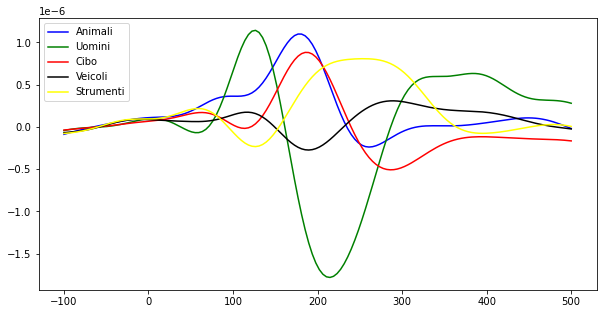

In [82]:
#Calcolo la media 
animali=0
uomini=0
cibo=0
veicoli=0
strumenti=0

for  i in range(len(vett_animali)):
    animali=animali+vett_animali[i]
    uomini=uomini+vett_uomini[i]
    cibo=cibo+vett_cibo[i]
    veicoli=veicoli+vett_veicoli[i]
    strumenti=strumenti+vett_strumenti[i]
    
animali=animali/len(features_a)
uomini=uomini/len(features_a)
cibo=cibo/len(features_a)
veicoli=veicoli/len(features_a)
strumenti=strumenti/len(features_a)


#plotto i risultati
plt.figure(figsize = (10, 5))
x=np.linspace(-100,500,144)
plt.plot(x,animali, color='blue', label='Animali')
plt.plot(x,uomini, color='green',label='Uomini')
plt.plot(x,cibo, color='red', label='Cibo')
plt.plot(x,veicoli, color='black', label='Veicoli')
plt.plot(x,strumenti, color='yellow', label='Strumenti')

plt.legend()

In [83]:
x[120]

403.4965034965035

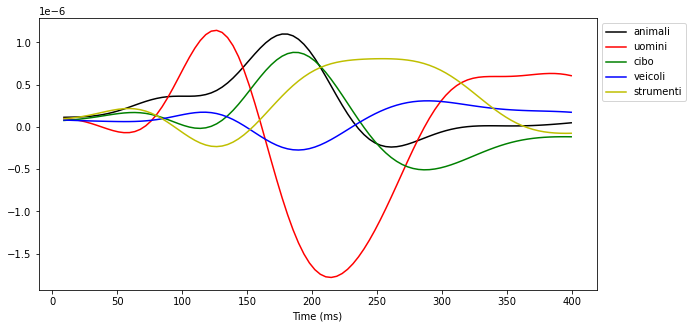

In [84]:
#Taglio il segnale a 400

animali_c=np.delete(animali,[np.concatenate((np.arange(0,26,1),np.arange(120,144,1)),axis=0)])
uomini_c=np.delete(uomini,[np.concatenate((np.arange(0,26,1),np.arange(120,144,1)),axis=0)])
cibo_c=np.delete(cibo,[np.concatenate((np.arange(0,26,1),np.arange(120,144,1)),axis=0)])
veicoli_c=np.delete(veicoli,[np.concatenate((np.arange(0,26,1),np.arange(120,144,1)),axis=0)])
strumenti_c=np.delete(strumenti,[np.concatenate((np.arange(0,26,1),np.arange(120,144,1)),axis=0)])
x_c=np.delete(x,[np.concatenate((np.arange(0,26,1),np.arange(120,144,1)),axis=0)])

plt.figure(figsize = (10, 5))
plt.plot(x_c,animali_c,color='k', label = 'animali')
plt.plot(x_c,uomini_c,color='r',label = 'uomini')
plt.plot(x_c,cibo_c,color='g', label = 'cibo')
plt.plot(x_c,veicoli_c,color='b',label = 'veicoli')
plt.plot(x_c,strumenti_c,color='y', label = 'strumenti')
plt.xlabel('Time (ms)')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')



#Calcolo la CWT per il segnale croppato 
cwt_animali=pywt.cwt(animali_c,np.arange(1,50),'morl')
cwt_uomini=pywt.cwt(uomini_c,np.arange(1,50),'morl')
cwt_cibo=pywt.cwt(cibo_c,np.arange(1,50),'morl')
cwt_veicoli=pywt.cwt(veicoli_c,np.arange(1,50),'morl')
cwt_strumenti=pywt.cwt(strumenti_c,np.arange(1,50),'morl')



In [85]:
vett_animali_c=[np.delete(i,[np.concatenate((np.arange(0,26,1),np.arange(120,144,1)),axis=0)])for i in vett_animali ]
vett_uomini_c =[np.delete(i,[np.concatenate((np.arange(0,26,1),np.arange(120,144,1)),axis=0)]) for i in vett_uomini]
vett_cibo_c=[np.delete(i,[np.concatenate((np.arange(0,26,1),np.arange(120,144,1)),axis=0)])for i in vett_cibo ]
vett_veicoli_c =[np.delete(i,[np.concatenate((np.arange(0,26,1),np.arange(120,144,1)),axis=0)]) for i in vett_veicoli]
vett_strumenti_c=[np.delete(i,[np.concatenate((np.arange(0,26,1),np.arange(120,144,1)),axis=0)])for i in vett_strumenti ]

#calcolo le CWT per ogni categoria 
cwt_animali_vector=[pywt.cwt(i,np.arange(1,12),'morl')for  i in vett_animali_c]
cwt_uomini_vector =[pywt.cwt(i,np.arange(1,12),'morl')for  i in vett_uomini_c]
cwt_cibo_vector=[pywt.cwt(i,np.arange(1,12),'morl')for  i in vett_cibo_c]
cwt_veicoli_vector =[pywt.cwt(i,np.arange(1,12),'morl')for  i in vett_veicoli_c]
cwt_strumenti_vector=[pywt.cwt(i,np.arange(1,12),'morl')for  i in vett_strumenti_c]


In [86]:
features_a=[cwt_animali_vector[i][0].flatten() for  i in range(len(vett_uomini_c))]
features_u=[cwt_uomini_vector[i][0].flatten()  for  i in range(len(vett_uomini_c))]
features_c=[cwt_cibo_vector[i][0].flatten() for  i in range(len(vett_uomini_c))]
features_v=[cwt_veicoli_vector[i][0].flatten()  for  i in range(len(vett_uomini_c))]
features_s=[cwt_strumenti_vector[i][0].flatten() for  i in range(len(vett_uomini_c))]


In [87]:
#Lo salvo come pandas 
df1 = pd.DataFrame (features_a)
df2 = pd.DataFrame (features_u)
df3 = pd.DataFrame (features_c)
df4 = pd.DataFrame (features_v)
df5 = pd.DataFrame (features_s)
frames = [[df1, df2],[df1, df3],[df1, df4],[df1, df5],[df2, df3],[df2, df4],[df2, df5],[df3, df4],[df3, df5],[df4, df5]]

df =[pd.concat(i) for i in frames]

In [88]:
a_type=np.zeros(len(features_a), dtype=int)
b_type=np.ones(len(features_a), dtype=int)
c_type=np.full((1,len(features_a)),2)
d_type=np.full((1,len(features_a)),3)
e_type=np.full((1,len(features_a)),4)
types=[a_type,b_type,c_type[0],d_type[0],e_type[0]]
k=0
h=0
for i in range(len(types)):
    k=i
    for j in range (len(types)-i-1):
        k=k+1
        df[h].insert(0, "Type", np.concatenate((types[i],types[k])) ,True)
        h=h+1

In [89]:
label=[np.array(i['Type']) for i in df]
features=[ i.drop('Type', axis = 1) for i in df]

In [90]:
#applico PCA
from sklearn.preprocessing import StandardScaler
df=[StandardScaler().fit_transform(i) for i in features] 


from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents =[ pca.fit_transform(i) for i in df]
principalDf = [pd.DataFrame(data = i, columns = ['pc 1','pc 2']) for i in principalComponents]


principalDf[2].head()

,pc 1,pc 2
0,-17.412421,8.108310
1,-17.287000,-4.954753
2,-32.223706,-15.784002
3,-3.798753,5.393769
4,-29.885845,5.900220


In [91]:
combinazioni=['Animali_Uomini', 'Animali_Cibo', 'Animali_Veicoli', 'Animali_Strumenti', 'Uomini_Cibo', 'Uomini_Veicoli',
             'Uomini_Strumenti', 'Cibo_Veicoli', 'Cibo_Strumenti', 'Veicoli_Strumenti']
print(len(combinazioni))

10


In [92]:
#Definizione funzione SVM

def SVM_traintest(labels, features,combinazioni):
    features_train, features_test, labels_train, labels_test = train_test_split(features,labels, test_size=0.3)
    sc_X = StandardScaler()
    features_train = sc_X.fit_transform(features_train)
    features_test = sc_X.fit_transform(features_test)
    clf=OneVsRestClassifier(svm.SVC(kernel='rbf'))
    clf.fit(features_train, labels_train)
    labels_pred=clf.predict(features_test)
    print('ACCURATEZZA', combinazioni) 
    print(accuracy_score(labels_test, labels_pred))
    cm = confusion_matrix(labels_test, labels_pred, labels=clf.classes_)
    sns.heatmap(cm, annot=True)
    print(classification_report(labels_test, labels_pred))
    return 

ACCURATEZZA Animali_Uomini
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         8

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

###################################################
ACCURATEZZA Animali_Cibo
0.6470588235294118
              precision    recall  f1-score   support

           0       0.50      0.83      0.62         6
           2       0.86      0.55      0.67        11

    accuracy                           0.65        17
   macro avg       0.68      0.69      0.65        17
weighted avg       0.73      0.65      0.65        17

###################################################
ACCURATEZZA Animali_Veicoli
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           3       1.00   

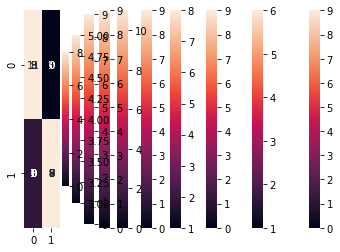

In [97]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

for  i in range(len(features)):
    
    SVM_traintest(label[i],principalDf[i],combinazioni[i])
    print("###################################################")

In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
for  i in range(len(combinazioni)):
    clf = svm.SVC(kernel='rbf',degree=2, C=1)
    splitter=KFold(n_splits=10, shuffle=True)
    scores = cross_val_score(clf, principalDf[i], label[i], cv=splitter)
    print("ACCURATEZZA TEN - FOLD, cross-trial",combinazioni[i])
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(),scores.std()))
    print(" ")

ACCURATEZZA TEN - FOLD, cross-trial Animali_Uomini
0.98 accuracy with a standard deviation of 0.06
 
ACCURATEZZA TEN - FOLD, cross-trial Animali_Cibo
0.72 accuracy with a standard deviation of 0.17
 
ACCURATEZZA TEN - FOLD, cross-trial Animali_Veicoli
1.00 accuracy with a standard deviation of 0.00
 
ACCURATEZZA TEN - FOLD, cross-trial Animali_Strumenti
0.91 accuracy with a standard deviation of 0.11
 
ACCURATEZZA TEN - FOLD, cross-trial Uomini_Cibo
1.00 accuracy with a standard deviation of 0.00
 
ACCURATEZZA TEN - FOLD, cross-trial Uomini_Veicoli
0.92 accuracy with a standard deviation of 0.09
 
ACCURATEZZA TEN - FOLD, cross-trial Uomini_Strumenti
1.00 accuracy with a standard deviation of 0.00
 
ACCURATEZZA TEN - FOLD, cross-trial Cibo_Veicoli
0.96 accuracy with a standard deviation of 0.07
 
ACCURATEZZA TEN - FOLD, cross-trial Cibo_Strumenti
0.60 accuracy with a standard deviation of 0.11
 
ACCURATEZZA TEN - FOLD, cross-trial Veicoli_Strumenti
0.91 accuracy with a standard deviatio

ACCURATEZZA Uomini_Cibo
0.9411764705882353
              precision    recall  f1-score   support

           1       0.88      1.00      0.93         7
           2       1.00      0.90      0.95        10

    accuracy                           0.94        17
   macro avg       0.94      0.95      0.94        17
weighted avg       0.95      0.94      0.94        17



[0.9411764705882353,
 array([[7, 0],
        [1, 9]], dtype=int64)]

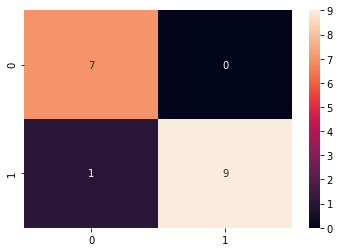

In [95]:
 SVM_traintest(label[4],features[4],combinazioni[4])